#Mileage Prediction - Regression Analysis


#Objective
The objective of this code is to perform regression analysis to predict the mileage (mpg) of a vehicle based on its features such as displacement, horsepower, weight, and acceleration. The code utilizes a linear regression model for this prediction.

#Import Library

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Data

In [23]:
data=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

In [24]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#Describe Data


In [25]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


#Data Visualization


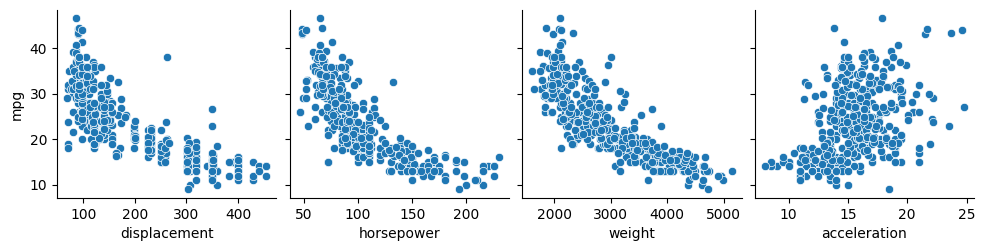

In [44]:
sns.pairplot(data,x_vars=[ 'displacement' ,'horsepower','weight','acceleration'],y_vars=['mpg']);

<Axes: xlabel='displacement', ylabel='mpg'>

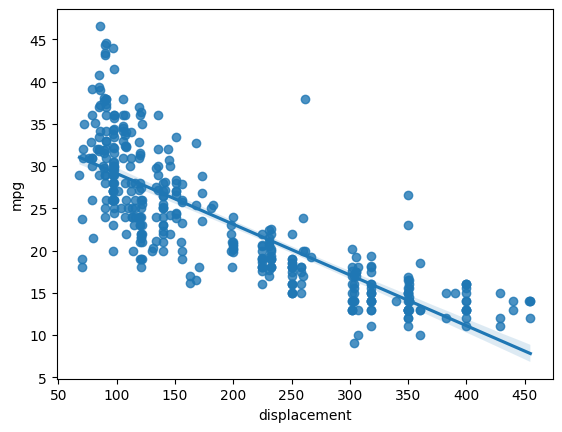

In [46]:
sns.regplot(x='displacement', y='mpg',data=data)

#Data Preprocessing


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [27]:
data.corr()

<ipython-input-27-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [28]:
data=data.dropna()

#Define Target Variable (y) and Feature Variables (X)


In [29]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [30]:
y=data['mpg']

In [31]:
X=data[['displacement', 'horsepower', 'weight',
       'acceleration']]

In [32]:
X.shape


(392, 4)

#Train Test Split


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, random_state= 2529)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

#Modeling


In [35]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()


In [36]:
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
lr.coef_

array([-0.0101203 , -0.04389329, -0.00484238, -0.04171959])

In [38]:
lr.intercept_

45.10570942699835

#Prediction


In [39]:
y_pred =lr.predict(X_test)

In [40]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

#Model Evaluation


In [41]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [43]:
mean_absolute_percentage_error(y_test,y_pred)

0.14713035779536746

In [42]:
mean_absolute_error(y_test,y_pred)

3.3286968643244115

#Explanation
above code is for regression analysis to predict vehicle mileage (mpg) based on key features such as displacement, horsepower, weight, and acceleration. After importing essential libraries and loading the dataset, the code explores the data's statistical properties and visualizes relationships between features and the target variable using seaborn pair plots and regression plots. To ensure data quality, missing values are handled by dropping corresponding rows. The linear regression model is selected and trained using scikit-learn, and its coefficients and intercept are obtained. Finally, the model's predictive accuracy is evaluated using metrics like mean absolute error (MAE) and mean absolute percentage error (MAPE).





